<h1>Primeira Análise</h1>

In [21]:
import pandas as pd
from lifelines import KaplanMeierFitter

In [4]:
df = pd.read_csv('data/SurvivalData.csv')
df.head()

,inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss
0,3.0,306,2,74,1,1.0,90.0,100.0,1175.0,NaN
1,3.0,455,2,68,1,0.0,90.0,90.0,1225.0,15.0
2,3.0,1010,1,56,1,0.0,90.0,90.0,NaN,15.0
3,5.0,210,2,57,1,1.0,90.0,60.0,1150.0,11.0
4,1.0,883,2,60,1,0.0,100.0,90.0,NaN,0.0


In [5]:
df.info()

# inst: código da instituição
# time: tempo de sobrevivência em dias
# status: status de censura: 1 = censurado, 2 = morto
# age: idade em anos
# sex: 1=masculino, 2=feminino
# ph.ecog: Pontuação de desempenho ECOG conforme avaliado pelo médico. 0 = assintomático, 1 = sintomático, mas completamente deambulador, 2 = na cama <50% do dia, 3 = na cama> 50% do dia, mas não confinado à cama, 4 = confinado à cama
# ph.karno: Pontuação de desempenho de Karnofsky (ruim = 0-bom = 100) avaliado pelo médico
# pat.karno: Pontuação de desempenho de Karnofsky conforme avaliado pelo paciente
# meal.cal: Calorias consumidas nas refeições
# wt.loss: Perda de peso nos últimos seis meses


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228 entries, 0 to 227
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   inst       227 non-null    float64
 1   time       228 non-null    int64  
 2   status     228 non-null    int64  
 3   age        228 non-null    int64  
 4   sex        228 non-null    int64  
 5   ph.ecog    227 non-null    float64
 6   ph.karno   227 non-null    float64
 7   pat.karno  225 non-null    float64
 8   meal.cal   181 non-null    float64
 9   wt.loss    214 non-null    float64
dtypes: float64(6), int64(4)
memory usage: 17.9 KB


In [8]:
df['time'].describe()

# média de 10 meses

count     228.000000
mean      305.232456
std       210.645543
min         5.000000
25%       166.750000
50%       255.500000
75%       396.500000
max      1022.000000
Name: time, dtype: float64

In [9]:
df['status'].value_counts()

# 63 censurados
# 162 mortos 

status
2    165
1     63
Name: count, dtype: int64

In [10]:
df['age'].describe()

# média de 62 anos
# mais novo: 39
# mais velho: 82

count    228.000000
mean      62.447368
std        9.073457
min       39.000000
25%       56.000000
50%       63.000000
75%       69.000000
max       82.000000
Name: age, dtype: float64

In [11]:
df['sex'].value_counts()

# 138 homens
# 60 mulheres

sex
1    138
2     90
Name: count, dtype: int64

In [13]:
df['ph.ecog'].value_counts()

# 63 -> 0 = assintomático
# 113 -> 1 = sintomático, mas completamente deambulador
# 50 -> 2 = na cama <50% do dia
# 1 -> 3 = na cama> 50% do dia, mas não confinado à cama

ph.ecog
1.0    113
0.0     63
2.0     50
3.0      1
Name: count, dtype: int64

In [14]:
df['ph.karno'].value_counts() 

# avaliações 0 - ruim, 100 - boa de acordo com o medico

ph.karno
90.0     74
80.0     67
70.0     32
100.0    29
60.0     19
50.0      6
Name: count, dtype: int64

In [17]:
df['meal.cal'].describe()

# media de 928 calorias

count     181.000000
mean      928.779006
std       402.174707
min        96.000000
25%       635.000000
50%       975.000000
75%      1150.000000
max      2600.000000
Name: meal.cal, dtype: float64

In [19]:
df['wt.loss'].describe()

count    214.000000
mean       9.831776
std       13.139902
min      -24.000000
25%        0.000000
50%        7.000000
75%       15.750000
max       68.000000
Name: wt.loss, dtype: float64

b. Criar um objeto de sobrevivência

In [23]:
# Converter o status em booleano
df['event'] = df['status'] == 2

# Criar o objeto de sobrevivência usando Kaplan-Meier
kmf = KaplanMeierFitter()
kmf.fit(df['time'], df['event'], label='Survival')

# Visualizar as primeiras linhas do objeto de sobrevivência
print(kmf.survival_function_)

          Survival
timeline          
0.0       1.000000
5.0       0.995614
11.0      0.982456
12.0      0.978070
13.0      0.969298
...            ...
840.0     0.067127
883.0     0.050346
965.0     0.050346
1010.0    0.050346
1022.0    0.050346

[187 rows x 1 columns]


c. Encontre o ajuste a curva de sobrevivência de Kaplan-Meier

In [24]:
# Obter o número de eventos e instâncias
num_events = df['event'].sum()
num_instances = len(df)

print("Número de eventos:", num_events)
print("Número de instâncias:", num_instances)

Número de eventos: 165
Número de instâncias: 228


d. Visualizar o gráfico da função de sobrevivência

In [26]:
import matplotlib.pyplot as plt
from lifelines.plotting import add_at_risk_counts

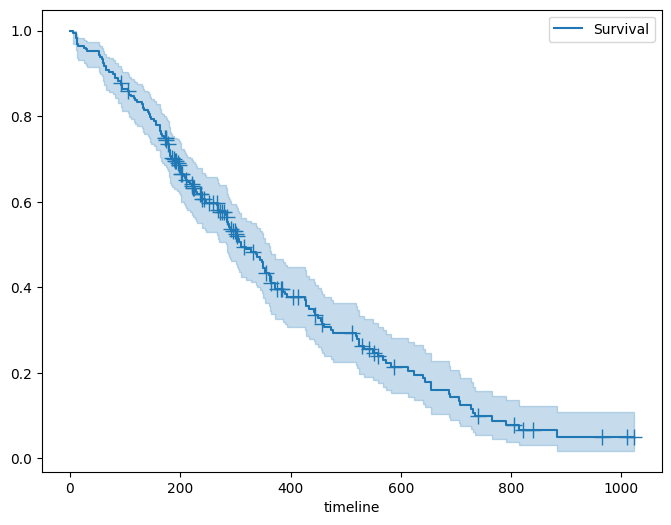

ValueError: Image size of 153871x538 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 640x480 with 2 Axes>

In [30]:
# Configurar o tamanho da figura
fig, ax = plt.subplots(figsize=(8, 6))  # Ajuste o tamanho conforme necessário

# Configurar o tamanho máximo da figura
plt.rcParams['agg.path.chunksize'] = 10000

# Configurar o gráfico
kmf.plot(ax=ax, show_censors=True)

# Configurar o gráfico
fig, ax = plt.subplots()
kmf.plot(ax=ax, show_censors=True)

# Adicionar o tempo médio de sobrevivência
median_survival_time = kmf.median_survival_time_
ax.axvline(x=median_survival_time, color='red', linestyle='--')
ax.text(median_survival_time, 0.5, f"p=0.5, t={median_survival_time:.2f}", color='red',
        verticalalignment='top', horizontalalignment='right', transform=ax.transAxes)

# Adicionar tabela de risco
add_at_risk_counts(kmf, ax=ax, labels=['At Risk'])

# Exibir o gráfico
plt.show()